## 1. importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

---

In [2]:
warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")
pd.set_option("display.max_columns", None)

plt.rcParams['figure.figsize'] = (12, 6)

---

## 2. load dataset

In [3]:
## load data
df = pd.read_csv('../data/raw/heart.csv')

In [4]:
print(f"shape = {df.shape}")
print(f"total rows = {df.shape[0]}")
print(f"total columns = {df.shape[1]}")

shape = (920, 16)
total rows = 920
total columns = 16


---

## 3. data overview

In [5]:
## preview data
print("displying first 10 rows of data")
display(df.head(10))

displying first 10 rows of data


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [6]:
## info dataset
print(f"dataset info")
df.info()

dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [7]:
## statistik deskriptif
print(f"descriptive statistic")
display(df.describe())

descriptive statistic


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


## 4. data quality check

In [8]:
# missing value
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Column' : missing.index,
    'Missing_Count' : missing.values,
    'Percentage' : missing_pct.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    display(missing_df)
else:
    print("No missing value")

,Column,Missing_Count,Percentage
13,ca,611,66.413043
14,thal,486,52.826087
12,slope,309,33.586957
7,fbs,90,9.782609
11,oldpeak,62,6.739130
5,trestbps,59,6.413043
10,exang,55,5.978261
9,thalch,55,5.978261
6,chol,30,3.260870
8,restecg,2,0.217391


In [9]:
# duplicate rows
duplicates = df.duplicated().sum()
print(f"\nduplicate rows : {duplicates}")
if duplicates > 0:
    print(f"percentage : {(duplicates / len(df)) * 100:.2f}%")


duplicate rows : 0


In [10]:
# unique value per column
unique_count = pd.DataFrame({
    'Column' : df.columns,
    'Unique_Values' : [df[col].nunique() for col in df.columns],
    'Data_Type' : df.dtypes.values
})
display(unique_count)

,Column,Unique_Values,Data_Type
0,id,920,int64
1,age,50,int64
2,sex,2,object
3,dataset,4,object
4,cp,4,object
5,trestbps,61,float64
6,chol,217,float64
7,fbs,2,object
8,restecg,3,object
9,thalch,119,float64


## 5. terget variable analysis

In [11]:
# identifikasi target varabel 
target_col = 'target' if 'target' in df.columns else 'output' if 'output' in df.columns else df.columns[-1]

print(f"target variabel : '{target_col}'")
print(f"target distribusi :")
print(df[target_col].value_counts())
print(f"\ntarget distribusi (%)")
print(df[target_col].value_counts(normalize=True) * 100)


target variabel : 'num'
target distribusi :
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

target distribusi (%)
num
0    44.673913
1    28.804348
2    11.847826
3    11.630435
4     3.043478
Name: proportion, dtype: float64


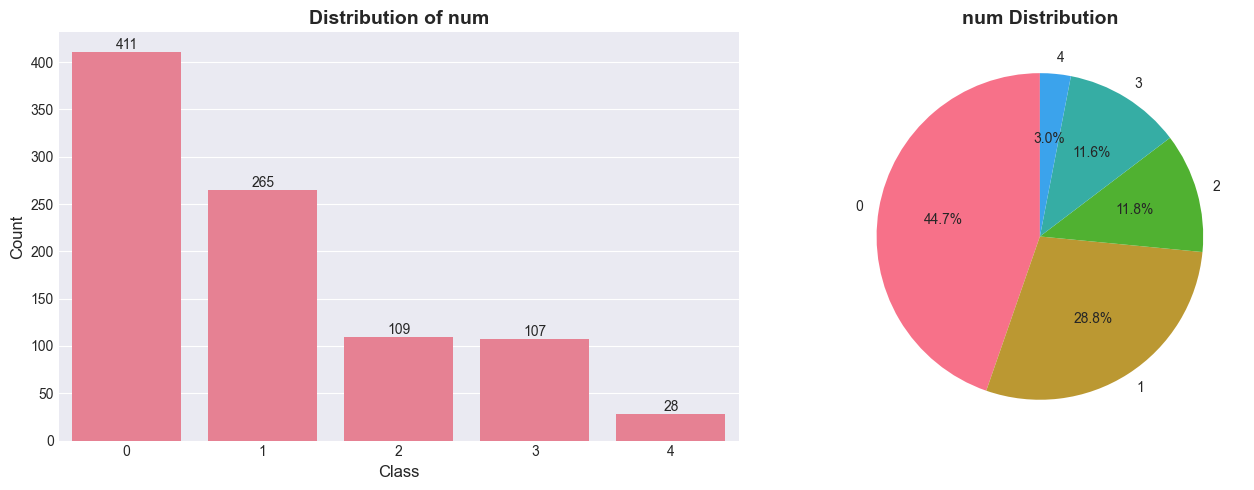

In [16]:
fig, axes = plt.subplots(1, 2, figsize = (14, 5))

sns.countplot(data=df, x=target_col, ax=axes[0])
axes[0].set_title(f'Distribution of {target_col}', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

for container in axes[0].containers:
    axes[0].bar_label(container)
    
# Pie chart
target_counts = df[target_col].value_counts()
axes[1].pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title(f'{target_col} Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/figures/target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
# Check class imbalance
imbalance_ratio = target_counts.max() / target_counts.min()
print(f"\nClass Imbalance Ratio: {imbalance_ratio:.2f}")
if imbalance_ratio > 1.5:
    print("WARNING: Dataset is imbalanced!.")
else:
    print("Dataset is balanced.")


Class Imbalance Ratio: 14.68


## 6. Numerical Features Analysis

In [19]:
# Identifikasi numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if target_col in numerical_cols:
    numerical_cols.remove(target_col)

print(f"\nNUMERICAL FEATURES ({len(numerical_cols)}):")
print(numerical_cols)


NUMERICAL FEATURES (7):
['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']


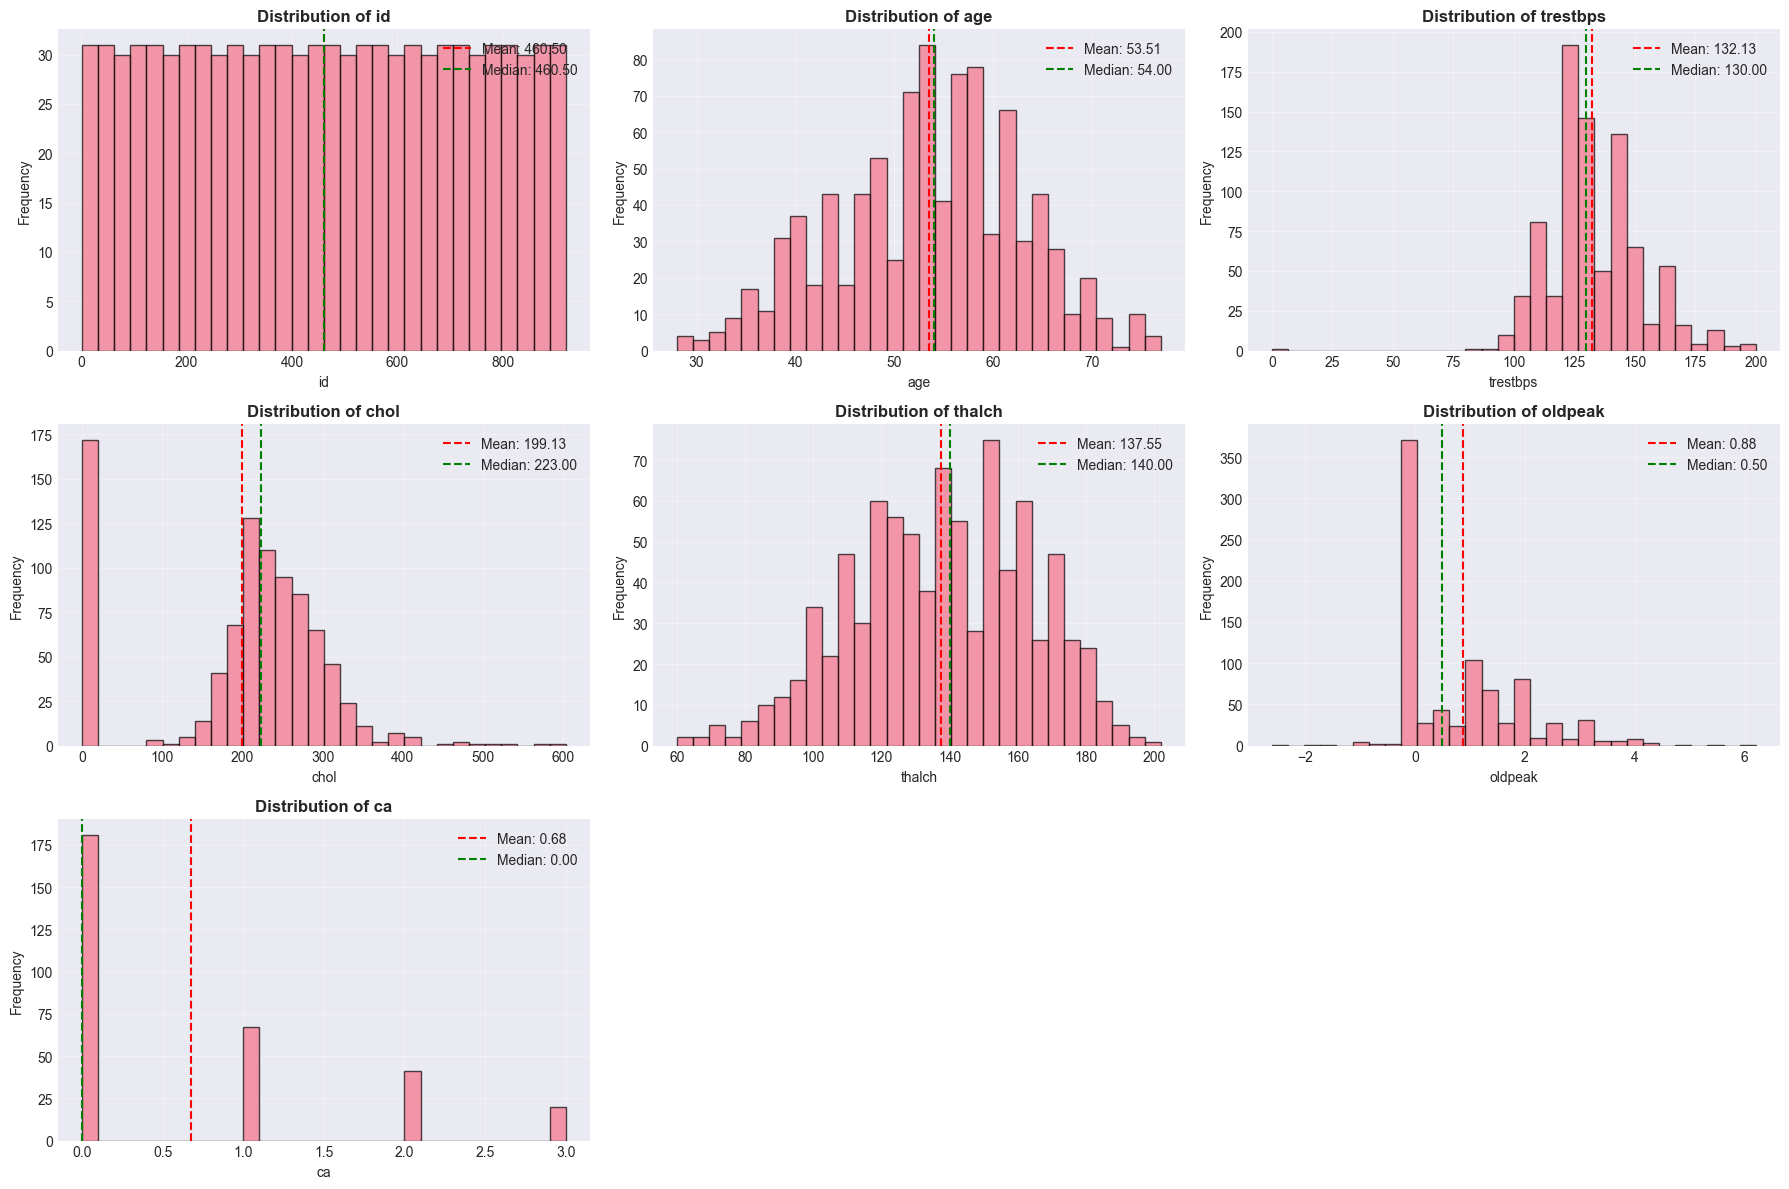

In [20]:
# Distribusi numerical features
n_cols = 3
n_rows = int(np.ceil(len(numerical_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(alpha=0.3)
    
    # Add statistics
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
    axes[idx].legend()

# Hide unused subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('../reports/figures/numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()


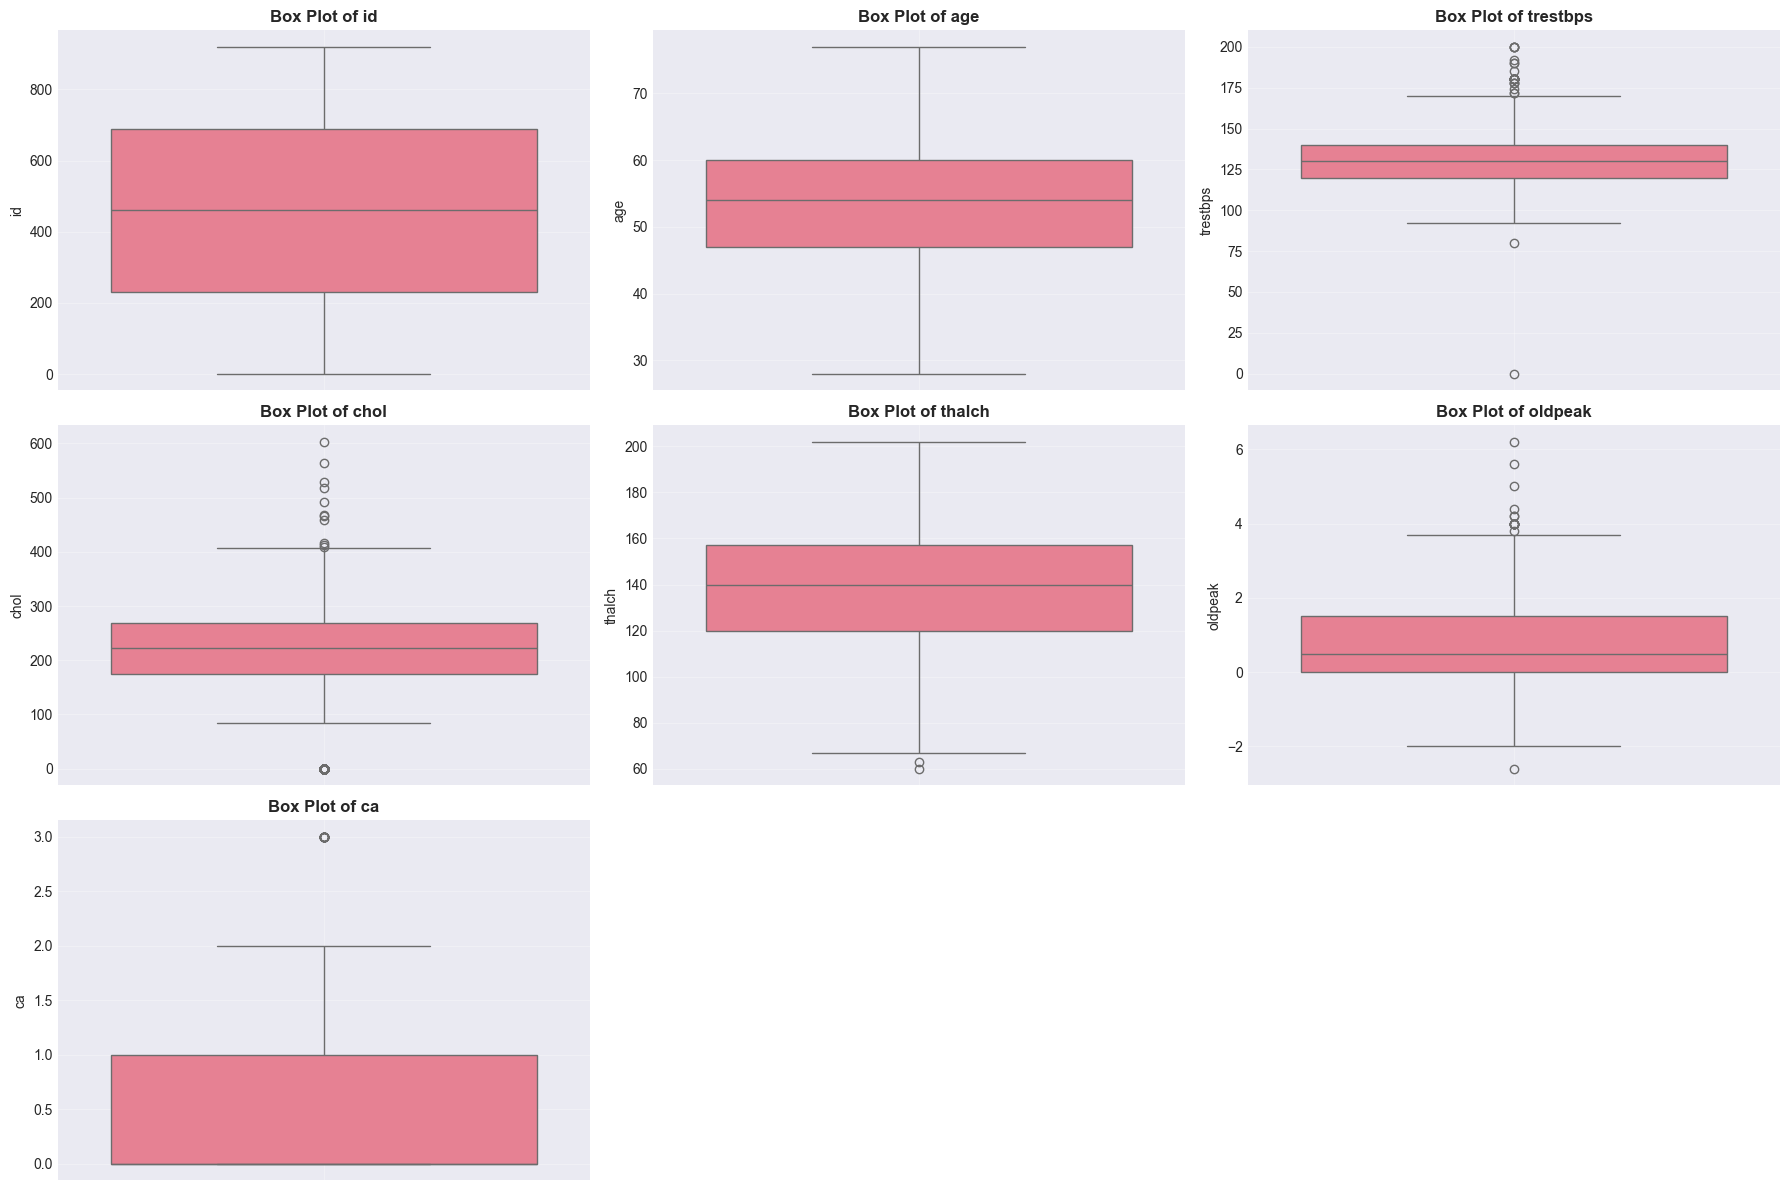

In [21]:
# outliers detection
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    sns.boxplot(data=df, y=col, ax=axes[idx])
    axes[idx].set_title(f'Box Plot of {col}', fontweight='bold')
    axes[idx].grid(alpha=0.3)

# Hide unused subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('../reports/figures/numerical_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

In [22]:
# Outlier detection menggunakan IQR method
print("\nOUTLIER DETECTION (IQR Method):")
outlier_summary = []

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(df)) * 100
    
    outlier_summary.append({
        'Feature': col,
        'Outlier_Count': outlier_count,
        'Percentage': f"{outlier_pct:.2f}%",
        'Lower_Bound': f"{lower_bound:.2f}",
        'Upper_Bound': f"{upper_bound:.2f}"
    })

outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df)



OUTLIER DETECTION (IQR Method):


,Feature,Outlier_Count,Percentage,Lower_Bound,Upper_Bound
0,id,0,0.00%,-458.50,1379.50
1,age,0,0.00%,27.50,79.50
2,trestbps,28,3.04%,90.00,170.00
3,chol,183,19.89%,35.50,407.50
4,thalch,2,0.22%,64.50,212.50
5,oldpeak,16,1.74%,-2.25,3.75
6,ca,20,2.17%,-1.50,2.50


## 7. Categorical Features Analysis

In [23]:
# Identifikasi categorical columns (termasuk yang encoded sebagai angka)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

In [24]:
# Tambahkan kolom numerical yang sebenarnya categorical (unique values < 10)
potential_categorical = [col for col in numerical_cols if df[col].nunique() < 10]
categorical_cols.extend(potential_categorical)

if target_col in categorical_cols:
    categorical_cols.remove(target_col)

print(f"\nCATEGORICAL FEATURES ({len(categorical_cols)}):")
print(categorical_cols)


CATEGORICAL FEATURES (9):
['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']


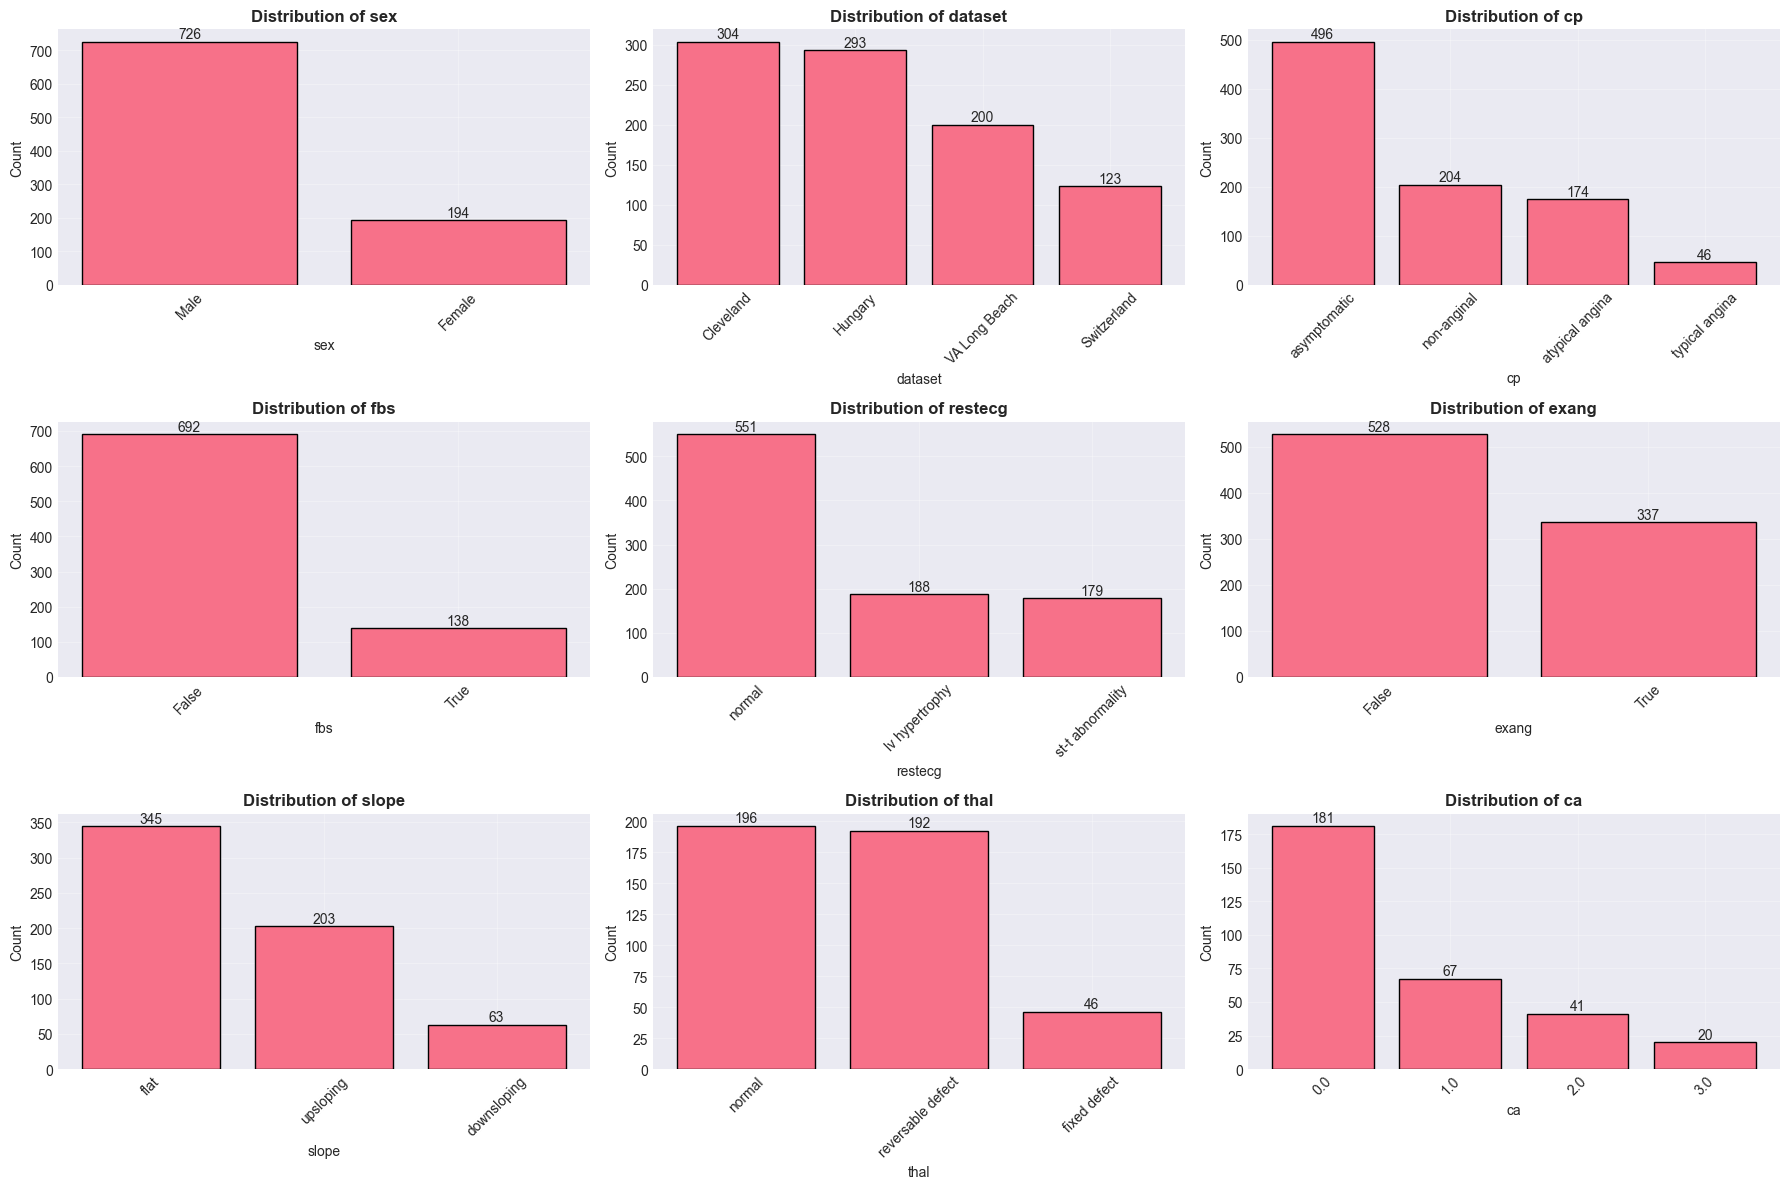

In [25]:
# Distribusi categorical features
if len(categorical_cols) > 0:
    n_cols = 3
    n_rows = int(np.ceil(len(categorical_cols) / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
    axes = axes.flatten()
    
    for idx, col in enumerate(categorical_cols):
        value_counts = df[col].value_counts()
        axes[idx].bar(value_counts.index.astype(str), value_counts.values, edgecolor='black')
        axes[idx].set_title(f'Distribution of {col}', fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Count')
        axes[idx].tick_params(axis='x', rotation=45)
        axes[idx].grid(alpha=0.3)
        
        # Add value labels
        for i, v in enumerate(value_counts.values):
            axes[idx].text(i, v + 0.5, str(v), ha='center', va='bottom')
    
    # Hide unused subplots
    for idx in range(len(categorical_cols), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.savefig('../reports/figures/categorical_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("No categorical features found.")

## 8. Correlation Analysis

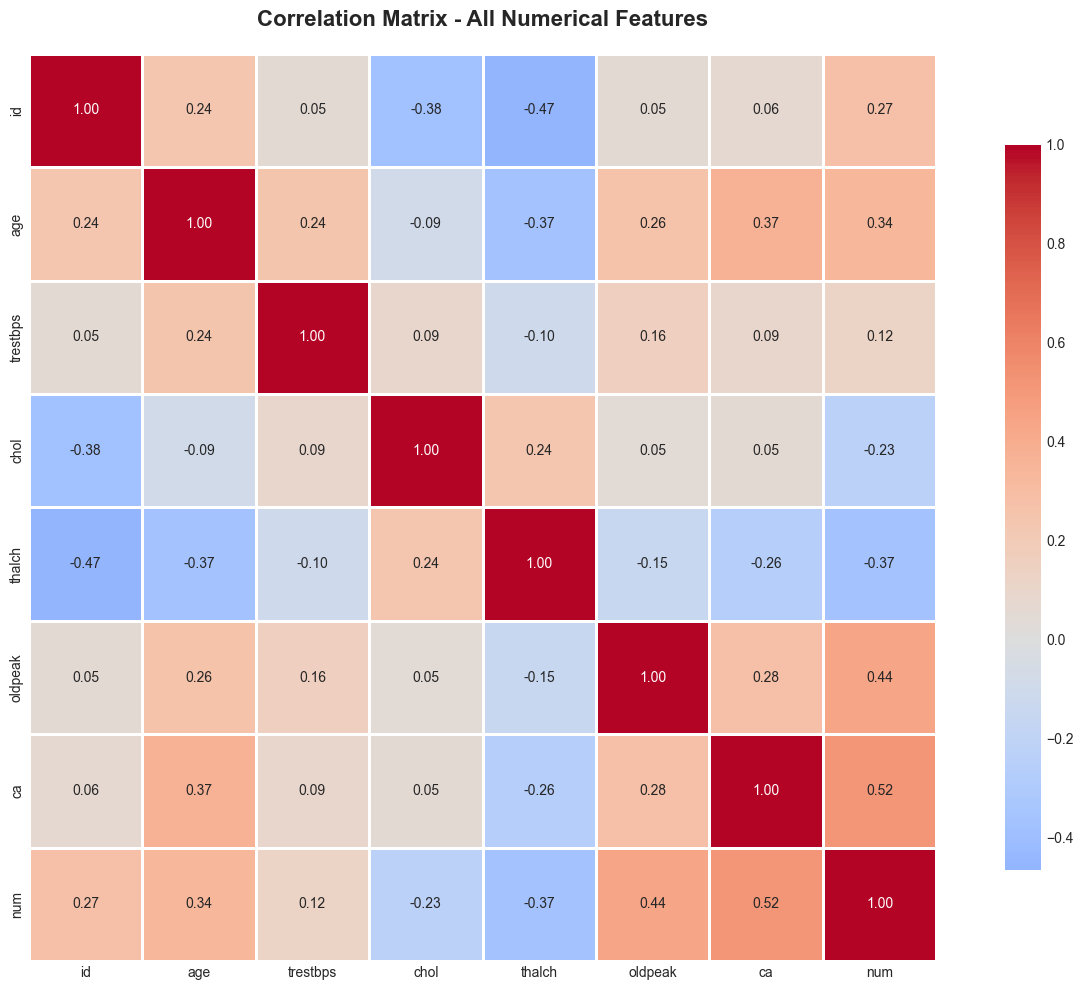

In [26]:
# Correlation matrix untuk numerical features
corr_data = df[numerical_cols + [target_col]].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_data, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - All Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../reports/figures/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [27]:
# Correlation dengan target variable (sorted)
target_corr = corr_data[target_col].drop(target_col).sort_values(ascending=False)

print(f"\nCORRELATION WITH TARGET ({target_col}):")
print(target_corr)


CORRELATION WITH TARGET (num):
ca          0.516216
oldpeak     0.443084
age         0.339596
id          0.273552
trestbps    0.122291
chol       -0.231547
thalch     -0.366265
Name: num, dtype: float64


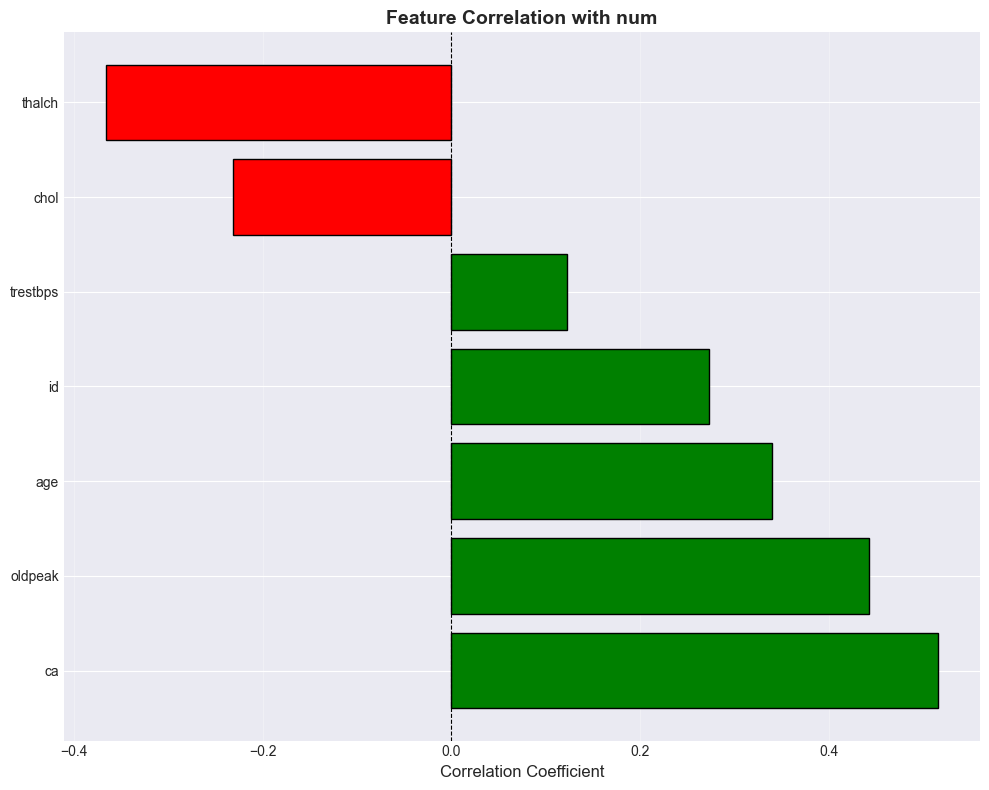

In [28]:
# Visualisasi
plt.figure(figsize=(10, 8))
colors = ['green' if x > 0 else 'red' for x in target_corr.values]
plt.barh(range(len(target_corr)), target_corr.values, color=colors, edgecolor='black')
plt.yticks(range(len(target_corr)), target_corr.index)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.title(f'Feature Correlation with {target_col}', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('../reports/figures/target_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

## 9. Bivariate Analysis (Features vs Target)

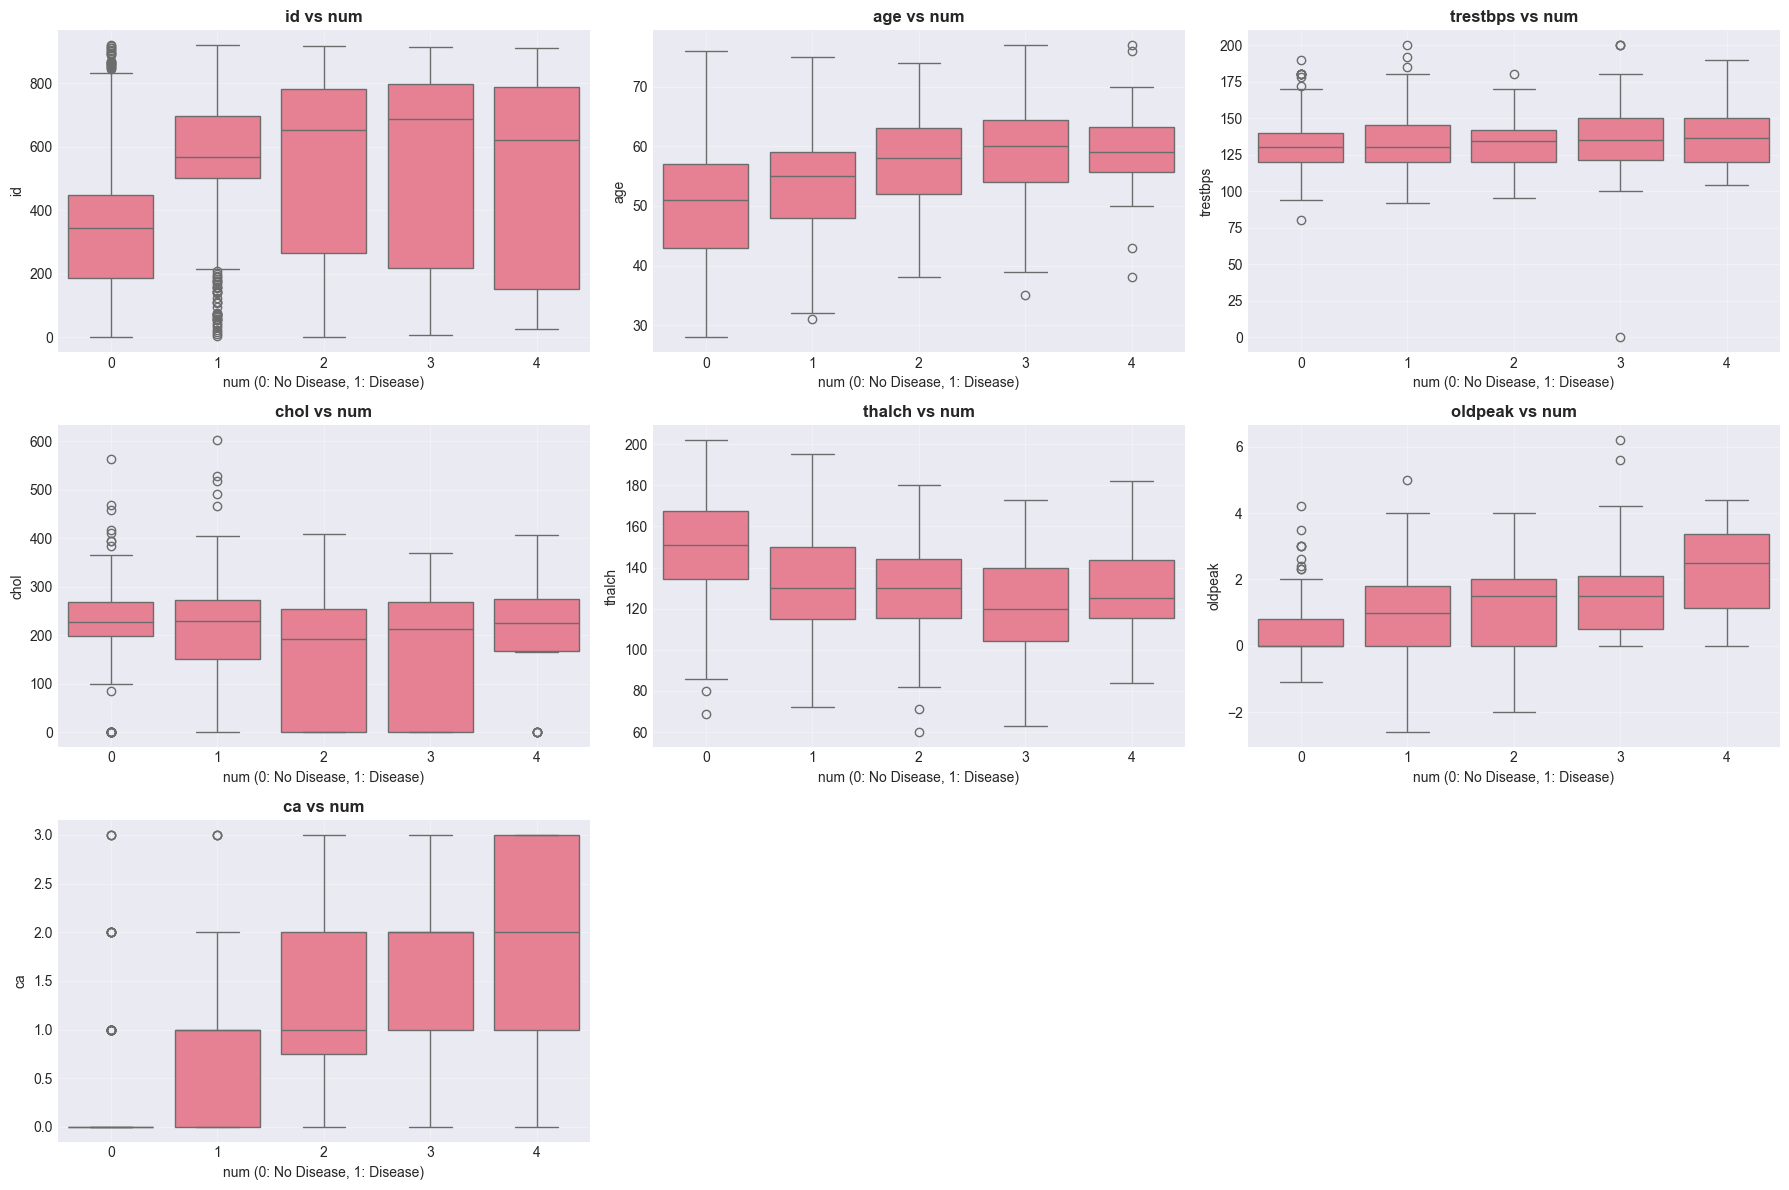

In [29]:
# Numerical features vs Target
n_cols = 3
n_rows = int(np.ceil(len(numerical_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x=target_col, y=col, ax=axes[idx])
    axes[idx].set_title(f'{col} vs {target_col}', fontweight='bold')
    axes[idx].set_xlabel(f'{target_col} (0: No Disease, 1: Disease)')
    axes[idx].grid(alpha=0.3)

# Hide unused subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('../reports/figures/bivariate_numerical.png', dpi=300, bbox_inches='tight')
plt.show()

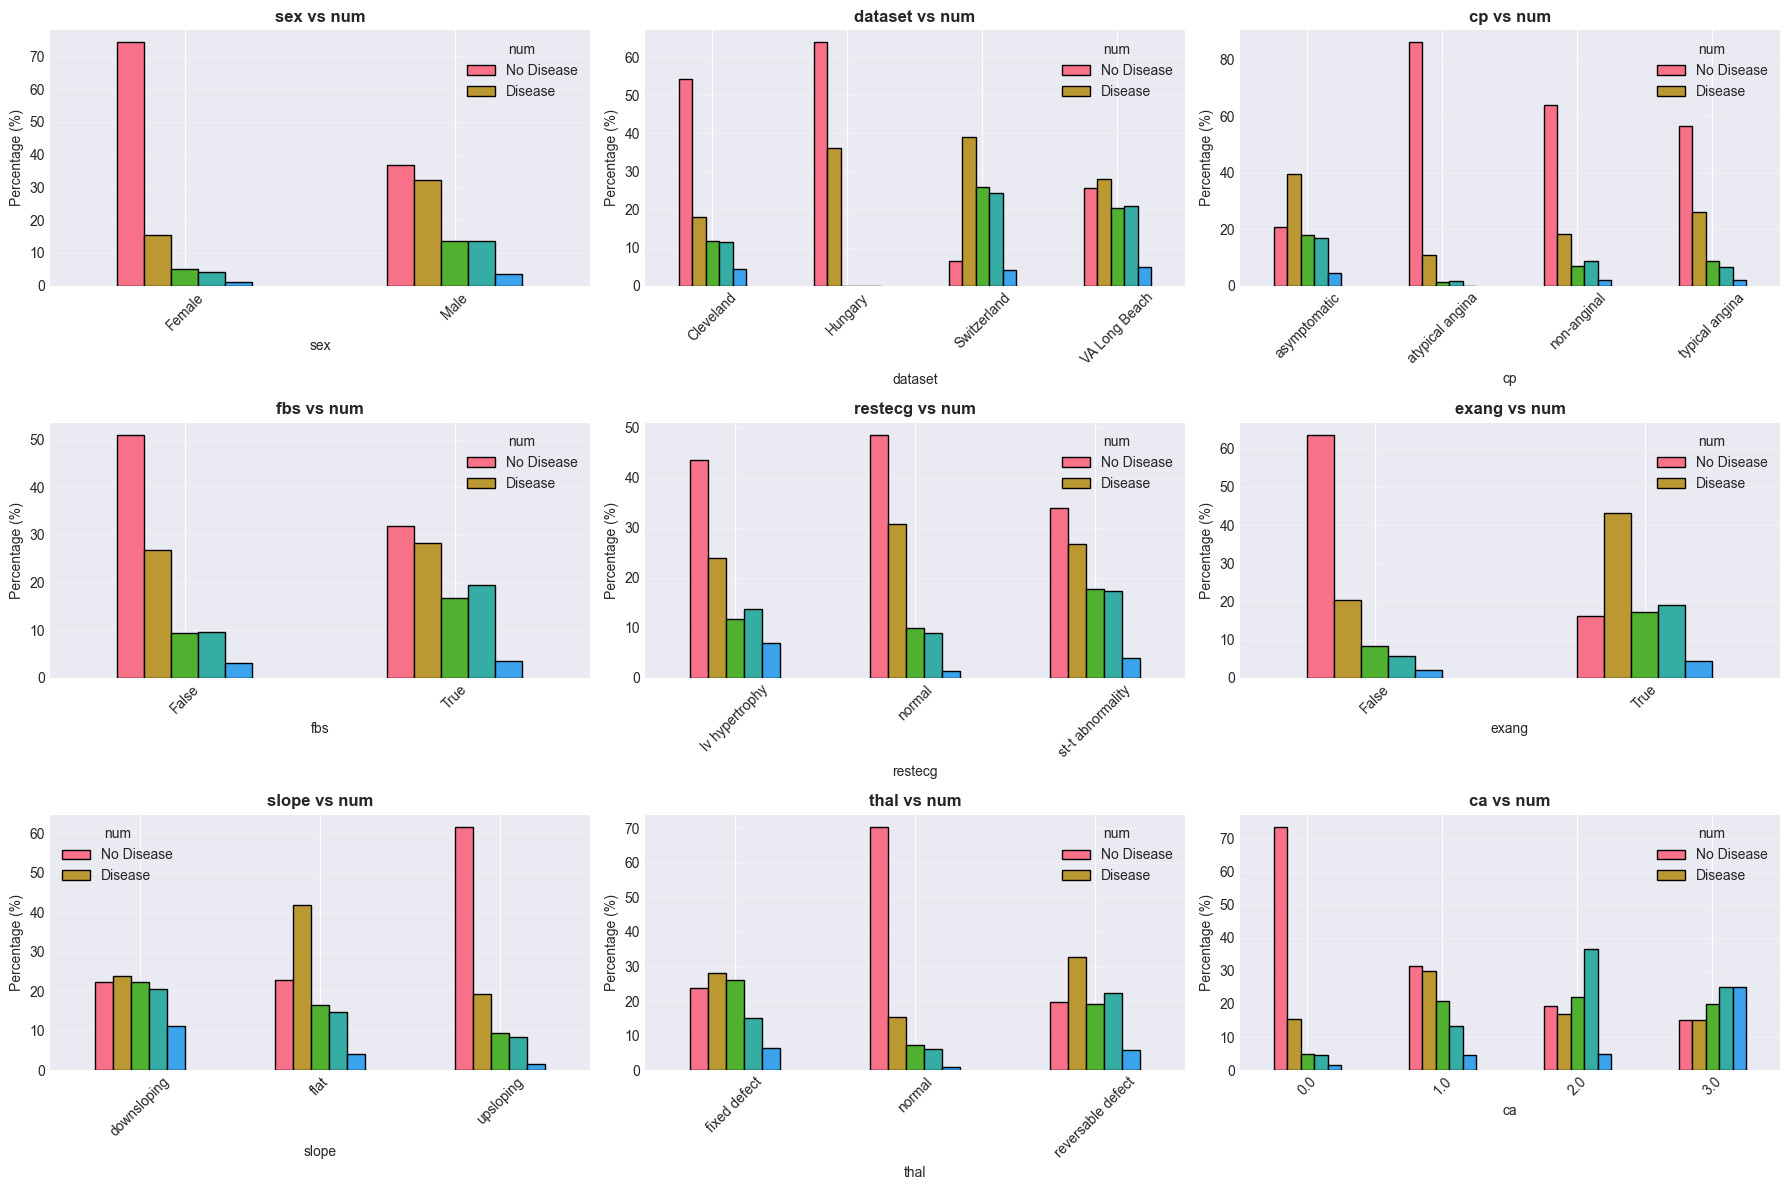

In [30]:
# Categorical features vs Target
if len(categorical_cols) > 0:
    n_cols = 3
    n_rows = int(np.ceil(len(categorical_cols) / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
    axes = axes.flatten()
    
    for idx, col in enumerate(categorical_cols):
        cross_tab = pd.crosstab(df[col], df[target_col], normalize='index') * 100
        cross_tab.plot(kind='bar', ax=axes[idx], edgecolor='black')
        axes[idx].set_title(f'{col} vs {target_col}', fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Percentage (%)')
        axes[idx].legend(title=target_col, labels=['No Disease', 'Disease'])
        axes[idx].tick_params(axis='x', rotation=45)
        axes[idx].grid(alpha=0.3, axis='y')
    
    # Hide unused subplots
    for idx in range(len(categorical_cols), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.savefig('../reports/figures/bivariate_categorical.png', dpi=300, bbox_inches='tight')
    plt.show()

## 10. Key Insights & Summary

In [32]:
print("EDA SUMMARY - KEY INSIGHTS")

print(f"\n 1. DATASET OVERVIEW:")
print(f"   - Total Samples: {df.shape[0]}")
print(f"   - Total Features: {df.shape[1] - 1}")
print(f"   - Numerical Features: {len(numerical_cols)}")
print(f"   - Categorical Features: {len(categorical_cols)}")

print(f"\n 2. DATA QUALITY:")
print(f"   - Missing Values: {'Yes' if missing_df.shape[0] > 0 else 'No'}")
print(f"   - Duplicate Rows: {duplicates} ({(duplicates/len(df))*100:.2f}%)")

print(f"\n 3. TARGET VARIABLE ({target_col}):")
target_dist = df[target_col].value_counts()
for label, count in target_dist.items():
    pct = (count / len(df)) * 100
    print(f"   - Class {label}: {count} ({pct:.1f}%)")
print(f"   - Class Balance: {'Imbalanced' if imbalance_ratio > 1.5 else 'Balanced'}")

print(f"\n 4. TOP 5 FEATURES CORRELATED WITH TARGET:")
for i, (feature, corr_val) in enumerate(target_corr.head(5).items(), 1):
    print(f"   {i}. {feature}: {corr_val:.3f}")

print(f"\n 5. OUTLIERS DETECTED:")
outliers_detected = outlier_df[outlier_df['Outlier_Count'] > 0]
if len(outliers_detected) > 0:
    for _, row in outliers_detected.iterrows():
        print(f"   - {row['Feature']}: {row['Outlier_Count']} outliers ({row['Percentage']})")
else:
    print("   - No significant outliers detected")

EDA SUMMARY - KEY INSIGHTS

 1. DATASET OVERVIEW:
   - Total Samples: 920
   - Total Features: 15
   - Numerical Features: 7
   - Categorical Features: 9

 2. DATA QUALITY:
   - Missing Values: Yes
   - Duplicate Rows: 0 (0.00%)

 3. TARGET VARIABLE (num):
   - Class 0: 411 (44.7%)
   - Class 1: 265 (28.8%)
   - Class 2: 109 (11.8%)
   - Class 3: 107 (11.6%)
   - Class 4: 28 (3.0%)
   - Class Balance: Imbalanced

 4. TOP 5 FEATURES CORRELATED WITH TARGET:
   1. ca: 0.516
   2. oldpeak: 0.443
   3. age: 0.340
   4. id: 0.274
   5. trestbps: 0.122

 5. OUTLIERS DETECTED:
   - trestbps: 28 outliers (3.04%)
   - chol: 183 outliers (19.89%)
   - thalch: 2 outliers (0.22%)
   - oldpeak: 16 outliers (1.74%)
   - ca: 20 outliers (2.17%)
